In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
path_img = path/'images'
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_27.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_1.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_121.jpg')]

In [0]:
re = r'/([^/]+)_\d+.jpg$'

In [10]:
src = (ImageList.from_folder(path_img)
       .random_split_by_pct(0.2, seed=44)
       .label_from_re(re)
      )

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:203: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


# Трансформации

https://docs.fast.ai/vision.transform.html

In [17]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



In [0]:
tfms = get_transforms(max_rotate=15, xtra_tfms = [*rand_resize_crop(size=224)])

In [0]:
data = (src.transform(tfms, size=224, resize_method = ResizeMethod.CROP)
        .databunch(bs=64).normalize(imagenet_stats)) 

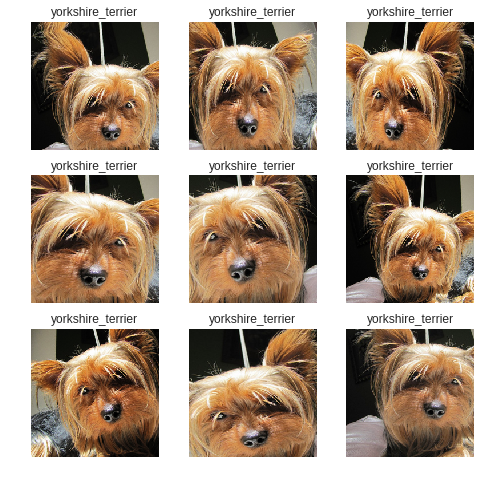

In [59]:
def _plot(i,j,ax):
    x,y = data.train_ds[11]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

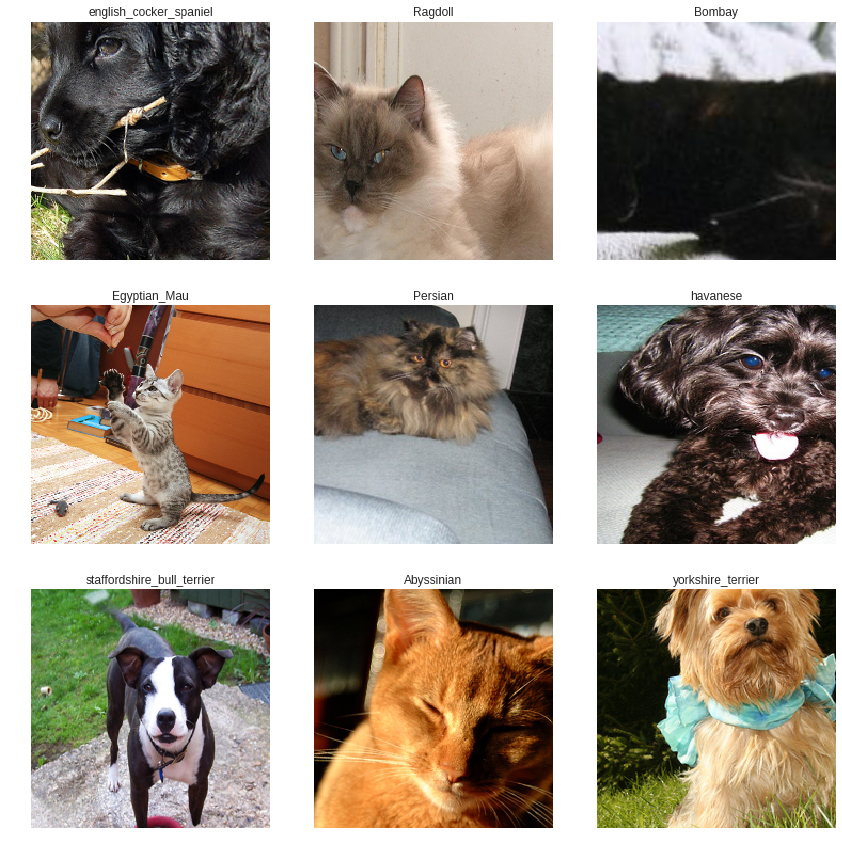

In [60]:
data.show_batch(3)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [71]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


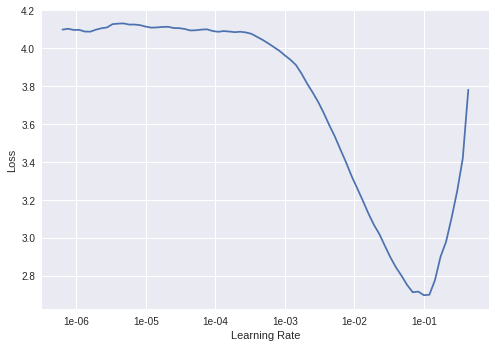

In [72]:
learn.recorder.plot()

In [73]:
learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.959465,0.696934,0.771313,02:10
1,0.583865,0.309504,0.901218,02:12


In [0]:
learn.save('stage_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


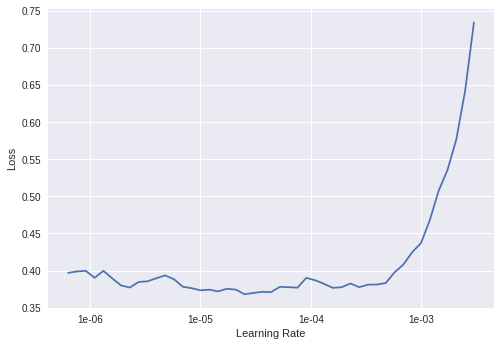

In [75]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.384146,0.300682,0.908660,02:15
1,0.361969,0.280410,0.914073,02:14
2,0.320300,0.268939,0.923545,02:14
3,0.286790,0.262172,0.921516,02:16
4,0.285797,0.261913,0.922192,02:15


In [0]:
tfms = get_transforms(max_rotate=15)
data = (src.transform(tfms, size=352, resize_method = ResizeMethod.CROP)
        .databunch(bs=32).normalize(imagenet_stats)) 
learn.data = data

In [79]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.284522,0.220912,0.928281,03:53
1,0.252853,0.197254,0.941137,03:52
2,0.215535,0.188149,0.939784,03:53
3,0.194877,0.184813,0.941813,03:52
4,0.185442,0.181589,0.941137,03:54
